In [1]:
#Importing the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For displaying all the rows and columns
pd.options.display.max_columns=None
# pd.options.display.max_rows=None

In [3]:
#Reading the dataset
df_house_price=pd.read_csv('HousePrices.csv')
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Understanding the shape of the data
df_house_price.shape

(1460, 81)

In [5]:
# There are 1460 rows in the dataset and 81 columns.

In [6]:
#Printing the concise summary of datset.
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* We will change the datatypes of variables which have been wrongly identified.

In [7]:
df_house_price['MSSubClass']=df_house_price['MSSubClass'].astype('object')

* As Id column is not providing any information so we will drop it.

In [8]:
df_house_price.drop('Id',axis=1,inplace=True)

In [9]:
pd.options.display.max_rows=None

In [10]:
# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = df_house_price.isnull().sum().sort_values(ascending=False)

# isnull().sum(): calculate the null values in each column for dataset
# isnull().count(): calculate the count values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
percent = (df_house_price.isnull().sum()/len(df_house_price)).sort_values(ascending=False)

# concat(): append dataframes
# axis=1: append by column
# keys: specify column name
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display dataframe of missing values
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [11]:
for i in df_house_price.columns:
    print(i)
    print("\n")
    print(df_house_price[i].unique())

MSSubClass


[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
MSZoning


['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage


[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea


[ 8450  9600 11250 ... 17217 13175  9717]
Street


['Pave' 'Grvl']
Alley


[nan 'Grvl' 'Pave']
LotShape


['Reg' 'IR1' 'IR2' 'IR3']
LandContour


['Lvl' 'Bnk' 'Low' 'HLS']
Utilities


['AllPub' 'NoSeWa']
LotConfig


['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope


['Gtl' 'Mod' 'Sev']
Neighborhood




In [12]:
df_house_price.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


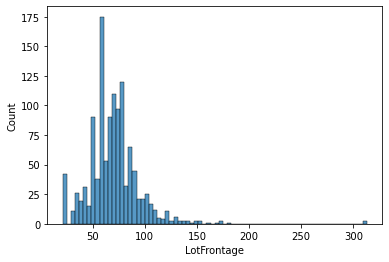

In [13]:
import seaborn as sns
sns.histplot(df_house_price['LotFrontage'])
plt.show()

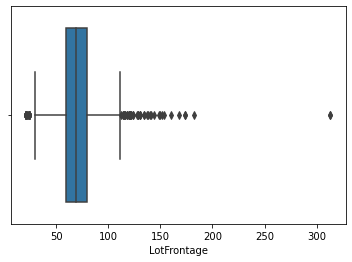

In [14]:
sns.boxplot(df_house_price['LotFrontage'])
plt.show()

In [15]:
# import missingno as msno

In [16]:
# msno.bar(df_house_price)

In [17]:
df_house_price['LotFrontage'].fillna(df_house_price['LotFrontage'].median(),inplace=True)

In [18]:
df_house_price['LotFrontage'].isna().sum()

0

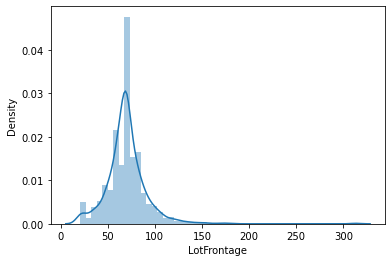

In [19]:
sns.distplot(df_house_price['LotFrontage'])
plt.show()

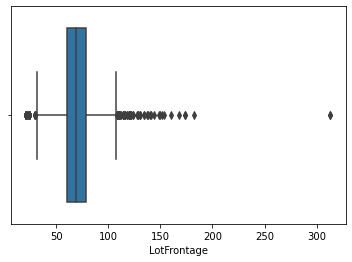

In [20]:
sns.boxplot(df_house_price['LotFrontage'])
plt.show()

In [21]:
df_house_price['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [22]:
df_house_price['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

## Case Study Day 2

In [23]:
df_house_price['PoolQC'].fillna('No Pool',inplace=True)

In [24]:
df_house_price['PoolQC'].unique()

array(['No Pool', 'Ex', 'Fa', 'Gd'], dtype=object)

In [25]:
df_house_price['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [26]:
df_house_price['MiscFeature'].fillna('None',inplace=True)

In [27]:
df_house_price['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [28]:
df_house_price['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [29]:
df_house_price['Alley'].fillna('No Alley Access',inplace=True)

In [30]:
df_house_price['Alley'].value_counts()

No Alley Access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [31]:
df_house_price['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [32]:
df_house_price['Fence'].fillna('No Fence',inplace=True)

In [33]:
df_house_price['Fence'].value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [34]:
df_house_price['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [35]:
df_house_price['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [36]:
df_house_price['FireplaceQu'].value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [37]:
# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = df_house_price.isnull().sum().sort_values(ascending=False)

# isnull().sum(): calculate the null values in each column for dataset
# isnull().count(): calculate the count values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
percent = (df_house_price.isnull().sum()/len(df_house_price)).sort_values(ascending=False)

# concat(): append dataframes
# axis=1: append by column
# keys: specify column name
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display dataframe of missing values
missing_data

,Total,Percent
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageType,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtCond,37,0.025342
BsmtQual,37,0.025342
BsmtFinType1,37,0.025342


In [38]:
df_house_price['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1962.0    21
1958.0    21
1966.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1997.0    19
1960.0    19
1978.0    19
1954.0    19
1974.0    18
1964.0    18
1995.0    18
1994.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1980.0    15
1967.0    15
1979.0    15
1969.0    15
1988.0    14
1973.0    14
1920.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1981.0    10
1925.0    10
1985.0    10
1941.0    10
1939.0     9
1975.0     9
1991.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1922.0     5
1916.0     5
1936.0     5
1945.0     4
1931.0     4
1982.0     4
1928.0     4
1935.0     4
1946.0     4
1921.0     3

In [39]:
df_house_price['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [40]:
df_house_price['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [41]:
df_house_price['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [42]:
df_house_price['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

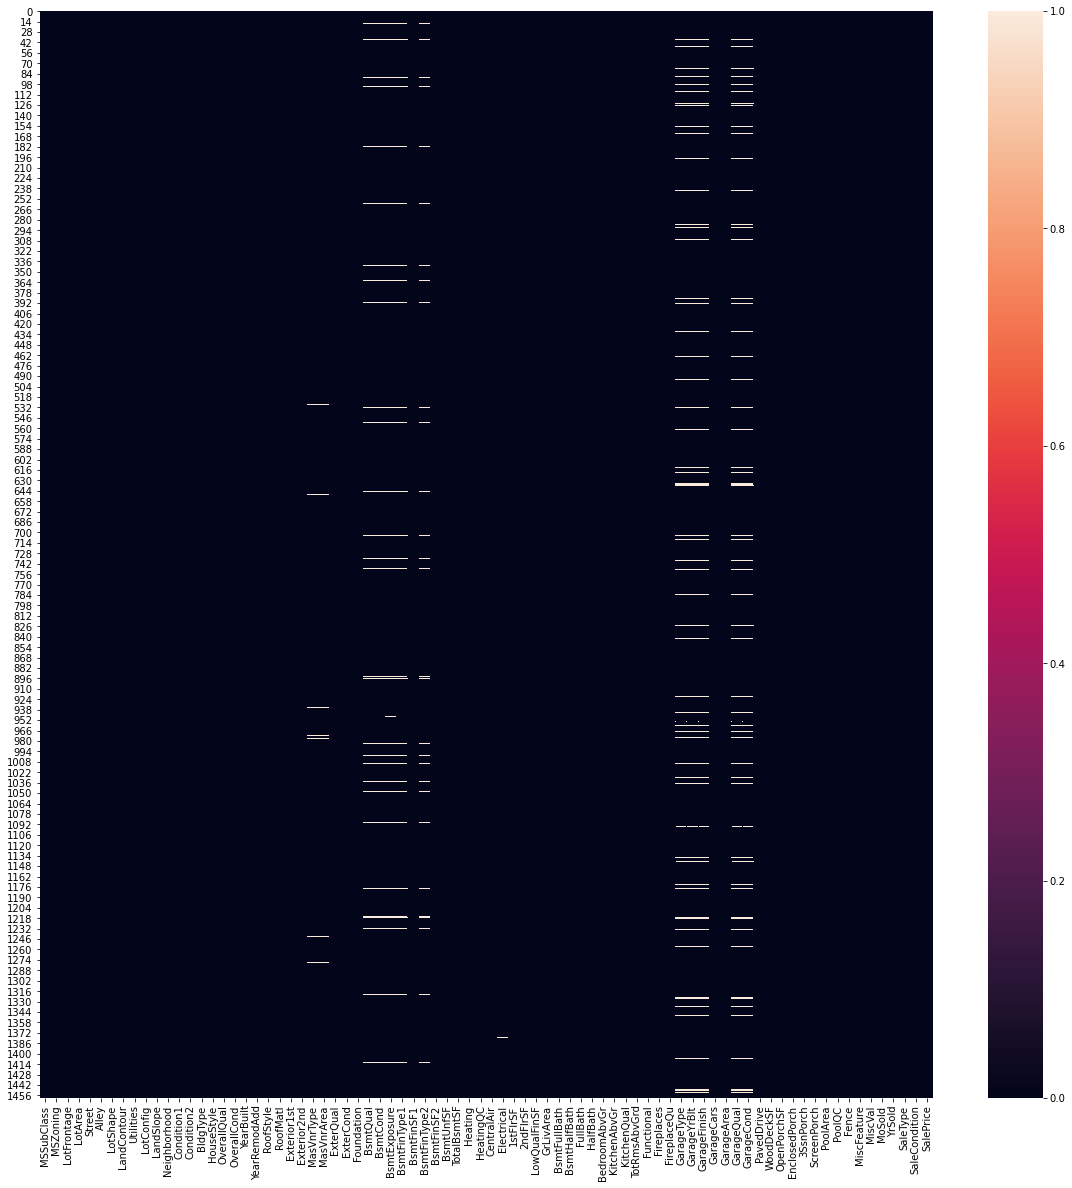

In [43]:
plt.rcParams['figure.figsize']=(20,20)
sns.heatmap(df_house_price.isna())
plt.show()

In [44]:
df_house_price[['GarageYrBlt','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond
0,2003.0,Attchd,RFn,TA,TA
1,1976.0,Attchd,RFn,TA,TA
2,2001.0,Attchd,RFn,TA,TA
3,1998.0,Detchd,Unf,TA,TA
4,2000.0,Attchd,RFn,TA,TA
5,1993.0,Attchd,Unf,TA,TA
6,2004.0,Attchd,RFn,TA,TA
7,1973.0,Attchd,RFn,TA,TA
8,1931.0,Detchd,Unf,Fa,TA
9,1939.0,Attchd,RFn,Gd,TA


In [45]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_house_price[i] = df_house_price[i].fillna('None')

In [46]:
# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = df_house_price.isnull().sum().sort_values(ascending=False)

# isnull().sum(): calculate the null values in each column for dataset
# isnull().count(): calculate the count values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
percent = (df_house_price.isnull().sum()/len(df_house_price)).sort_values(ascending=False)

# concat(): append dataframes
# axis=1: append by column
# keys: specify column name
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display dataframe of missing values
missing_data

,Total,Percent
GarageYrBlt,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtQual,37,0.025342
BsmtCond,37,0.025342
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
FireplaceQu,0,0.000000


In [47]:
df_house_price['GarageType'].isna().sum()

0

In [48]:
# for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
#     df_house_price[i] = df_house_price[i].fillna(0,inplace=True)

In [49]:
# Total houses whose Year build is not the same as Garage built year
# len(df_house_price.loc[df_house_price['GarageYrBlt']!=df_house_price['YearBuilt'],'GarageYrBlt'])

In [50]:
# df_house_price.loc[df_house_price['GarageYrBlt']==0,'GarageYrBlt'] = df_house_price[df_house_price['GarageYrBlt']==0]['YearBuilt']
# df_house_price[df_house_price['GarageYrBlt']==0]['GarageYrBlt']

* GarageYrBlt
** 1) Create Garage Age variable from GarageYrBlt feature
** 2) Check the Max Year built. Is it going to create age as 0 if not then we are fined to have age as 0 for no garage
** 3) Replace all the categorical variables with no garage and all the missing values in garage age with 0
** 4) Drop the GarageYrBlt

In [51]:
df_house_price['Age']=2021-df_house_price['GarageYrBlt']

In [52]:
df_house_price['Age'].isna().sum()

81

In [53]:
df_house_price['Age']=df_house_price['Age'].fillna(0)

In [54]:
df_house_price['Age'].isna().sum()

0

In [55]:
df_house_price.drop('GarageYrBlt',axis=1,inplace=True)

In [56]:
# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = df_house_price.isnull().sum().sort_values(ascending=False)

# isnull().sum(): calculate the null values in each column for dataset
# isnull().count(): calculate the count values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
percent = (df_house_price.isnull().sum()/len(df_house_price)).sort_values(ascending=False)

# concat(): append dataframes
# axis=1: append by column
# keys: specify column name
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display dataframe of missing values
missing_data

,Total,Percent
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtQual,37,0.025342
BsmtCond,37,0.025342
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
MSSubClass,0,0.000000
FireplaceQu,0,0.000000


In [57]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_house_price[i] = df_house_price[i].fillna('No Basement')

In [58]:
# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = df_house_price.isnull().sum().sort_values(ascending=False)

# isnull().sum(): calculate the null values in each column for dataset
# isnull().count(): calculate the count values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
percent = (df_house_price.isnull().sum()/len(df_house_price)).sort_values(ascending=False)

# concat(): append dataframes
# axis=1: append by column
# keys: specify column name
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display dataframe of missing values
missing_data

,Total,Percent
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000
GarageFinish,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000


In [59]:
df_house_price["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [60]:
df_house_price["MasVnrType"] = df_house_price["MasVnrType"].fillna("None")
df_house_price["MasVnrArea"] = df_house_price["MasVnrArea"].fillna(0)

In [61]:
df_house_price['Electrical'].mode()[0]

'SBrkr'

## Case Study Day 3

In [62]:
pd.crosstab(df_house_price['Electrical'],df_house_price['CentralAir'])

CentralAir,N,Y
Electrical,,
FuseA,22,72
FuseF,18,9
FuseP,3,0
Mix,0,1
SBrkr,52,1282


In [63]:
df_house_price[df_house_price['Electrical'].isnull()]['CentralAir']

1379    Y
Name: CentralAir, dtype: object

In [64]:
df_house_price['Electrical'].fillna('SBrkr',inplace=True)

In [65]:
total = df_house_price.isnull().sum().sort_values(ascending=False)
percent = (df_house_price.isnull().sum()/len(df_house_price)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MSSubClass,0,0.0
MSZoning,0,0.0
GarageFinish,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


* There are no null values in the dataset now.

In [66]:
### Segregating data into numerical and categorical variables

In [234]:
# Numerical variables
df_num=df_house_price.select_dtypes(include=np.number)
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,65.00,8450,7,5,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,18.00
1,80.00,9600,6,8,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,45.00
2,68.00,11250,7,5,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,20.00
3,60.00,9550,7,5,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,23.00
4,84.00,14260,8,5,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,21.00


In [68]:
# Categorical variables
df_cat=df_house_price.select_dtypes(exclude=np.number)
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,20,RL,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,70,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [69]:
df_cat.shape

(1460, 44)

In [70]:
for i in df_cat.columns:
    print(i)
    print(df_cat[i].unique())
    print("\n")

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]


MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']


Street
['Pave' 'Grvl']


Alley
['No Alley Access' 'Grvl' 'Pave']


LotShape
['Reg' 'IR1' 'IR2' 'IR3']


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']


Utilities
['AllPub' 'NoSeWa']


LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LandSlope
['Gtl' 'Mod' 'Sev']


Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


RoofMatl
['Co

In [71]:
df_house_price.groupby('BldgType')['SalePrice'].mean().reset_index().sort_values(by='SalePrice')

,BldgType,SalePrice
1,2fmCon,128432.258065
2,Duplex,133541.076923
3,Twnhs,135911.627907
4,TwnhsE,181959.342105
0,1Fam,185763.807377


In [72]:
# from sklearn.preprocessing import LabelEncoder
# cols = ('LotShape','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
# 'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu',
# 'GarageFinish','GarageQual','GarageCond','PoolQC','Fence')
# for i in cols:
#     label = LabelEncoder() 
#     df_cat[i] = label.fit_transform(list(df_cat[i].values))

In [73]:
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,20,RL,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,70,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [74]:
df_cat['PoolQC'].value_counts()

No Pool    1453
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

In [75]:
df_house_price['PoolQC'].value_counts()

No Pool    1453
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

In [76]:
# from sklearn.preprocessing import OrdinalEncoder
# X = np.array([['Low', 'Medium', 'High', 'Medium', 'Low']], dtype=object).T
# cats = ['Low', 'Medium', 'High']
# enc = OrdinalEncoder(categories=cats)
# enc.fit_transform(X)

In [77]:
# categ=['LotShape','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
# 'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu',
# 'GarageFinish','GarageQual','GarageCond','PoolQC','Fence']
# le=LabelEncoder()
# df_cat[categ]=df_cat[categ].apply(le.fit_transform)

## Case Study Day 4

In [78]:
# ordinal: Alley, LandContour, Utilities, LandSlope, BldgType, Electrical,   

In [79]:
total = df_house_price.isnull().sum().sort_values(ascending=False)
percent = (df_house_price.isnull().sum()/len(df_house_price)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MSSubClass,0,0.0
MSZoning,0,0.0
GarageFinish,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


In [80]:
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,20,RL,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,70,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [81]:
df_cat=pd.get_dummies(df_cat,drop_first=True)
df_cat.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,

In [82]:
df_cat.shape

(1460, 237)

In [83]:
df_num.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
LotFrontage,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771,-0.023601
LotArea,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.050809
OverallQual,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.381595
OverallCond,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.287367
YearBuilt,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,-0.636498
YearRemodAdd,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.530041
MasVnrArea,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,-0.183093
BsmtFinSF1,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.098714
BsmtFinSF2,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.095672
BsmtUnfSF,0.124098,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479,-0.160083


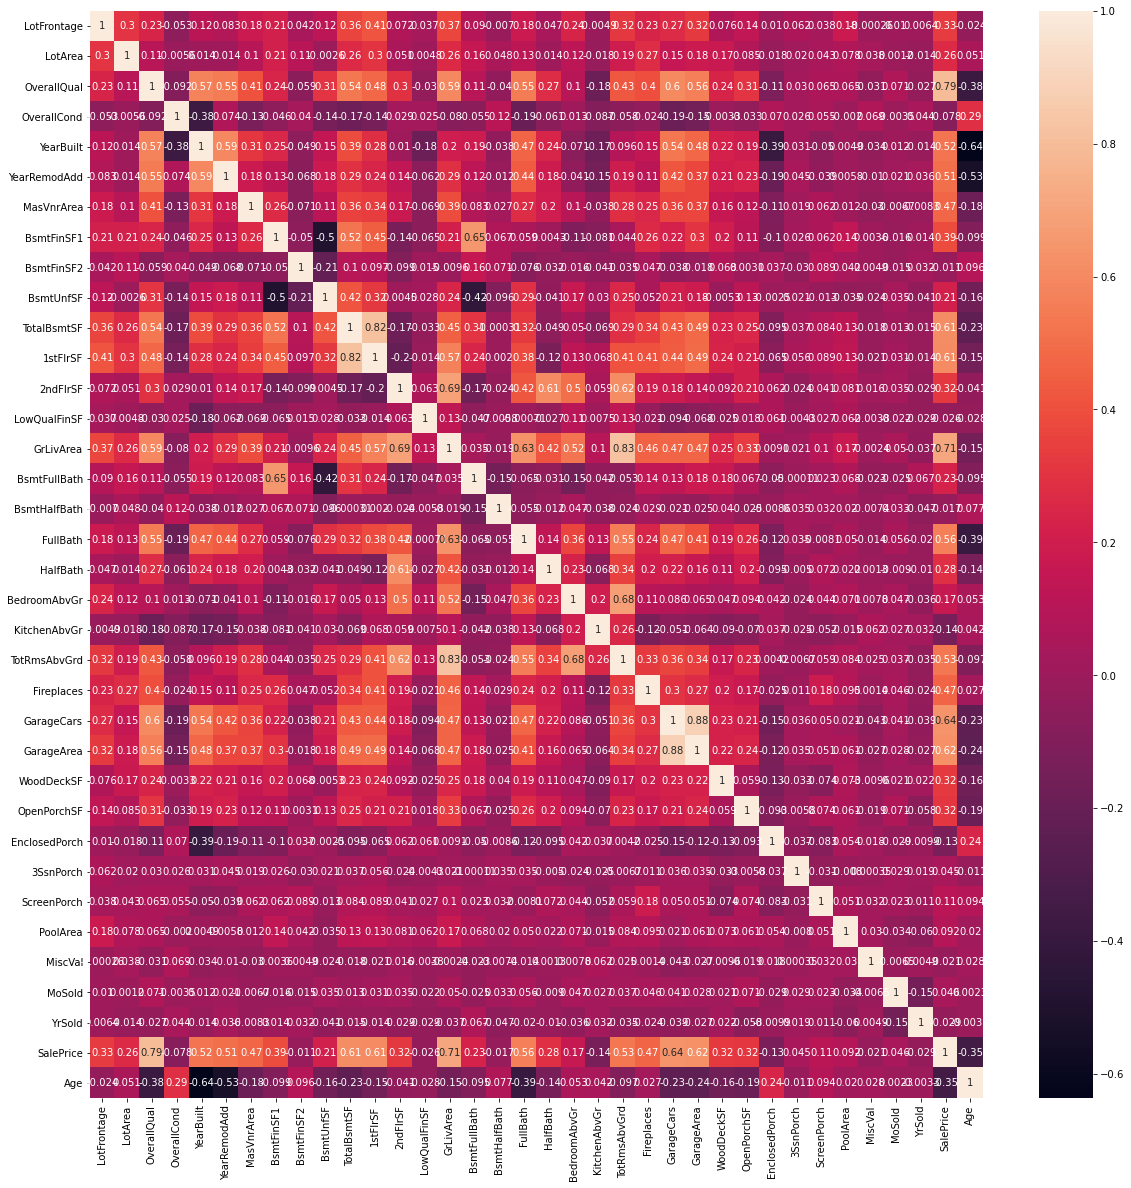

In [84]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [85]:
df_num.corr()[abs(df_num.corr())>0.6]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
LotFrontage,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982,NaN
OverallCond,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.636498
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#1stFlrSF and TotalBsmtSF, GrLivArea and TotalRmsAbvGrd, GarageCars and GarageArea

In [87]:
df_final=pd.concat([df_num,df_cat],axis=1)
df_final.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnP

In [89]:
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

In [90]:
X=df_final.drop('SalePrice',axis=1)
y=df_final['SalePrice']

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 272)
(292, 272)
(1168,)
(292,)


In [92]:
X_new=sm.add_constant(X_train)
model_1=sm.OLS(y_train,X_new).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     51.35
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:26:13   Log-Likelihood:                -13219.
No. Observations:                1168   AIC:                         2.696e+04
Df Residuals:                     909   BIC:                         2.827e+04
Df Model:                         258                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5.829e+05   1.22e+06     -0.478      0.633   -2.98e+06    1.81e+06
LotFrontage                 49.4905     50.080      0.988      0.323     -48.796     147.777
LotArea                      0.6714      0.147      4.581      0.000       0.384       0.959
OverallQual               6366.3389   1172.004      5.432      0.000    4066.191    8666.487
OverallCond               5268.5585    998.264      5.278      0.000    3309.389    7227.728
YearBuilt                  317.6481     94.047      3.378      0.001     133.074     502.222
YearRemodAdd                89.6475     62.946      1.424      0.155     -33.888     213.183
MasVnrArea                  34.9117      6.793      5.139      0.000      21.580      48.244
BsmtFinSF1                  13.3863      3.271      4.092      0.000       6.966      19.806
BsmtFinSF2                  10.2157      6.794      1.504      0.133      -3.118      23.550
BsmtUnfSF                   -3.6554      3.144     -1.163      0.245      -9.826       2.516
TotalBsmtSF                 19.9465      4.719      4.227      0.000      10.685      29.209
1stFlrSF                     7.2582      7.230      1.004      0.316      -6.931      21.447
2ndFlrSF                    30.9227      6.096      5.072      0.000      18.958      42.887
LowQualFinSF                -6.3049     15.174     -0.416      0.678     -36.085      23.475
GrLivArea                   31.8760      6.314      5.049      0.000      19.484      44.267
BsmtFullBath              1212.0150   2314.511      0.524      0.601   -3330.391    5754.421
BsmtHalfBath              1407.7611   3470.374      0.406      0.685   -5403.116    8218.638
FullBath                  5255.1802   2551.418      2.060      0.040     247.825    1.03e+04
HalfBath                  3207.0050   2431.944      1.319      0.188   -1565.873    7979.883
BedroomAbvGr             -3763.4548   1577.138     -2.386      0.017   -6858.709    -668.201
KitchenAbvGr             -1.134e+04   7205.613     -1.574      0.116   -2.55e+04    2801.300
TotRmsAbvGrd              1676.4708   1098.939      1.526      0.127    -480.281    3833.223
Fireplaces                5616.7290   2952.132      1.903      0.057    -177.058    1.14e+04
GarageCars                3189.2685   2702.714      1.180      0.238   -2115.017    8493.554
GarageArea                  17.0710      9.046      1.887      0.059      -0.683      34.825
WoodDeckSF                  19.9129      6.734      2.957      0.003       6.696      33.130
OpenPorchSF                  7.9310     14.223      0.558      0.577     -19.982      35.844
EnclosedPorch               15.2817     14.862      1.028      0.304     -13.887      44.450
3SsnPorch                   42.5481     24.854      1.712      0.087      -6.231      91.327
ScreenPorch   

In [93]:
df_final['BldgAge']=2021-df_final['YearBuilt']

In [94]:
df_final.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnP

In [95]:
df_final.drop('YearBuilt',axis=1,inplace=True)

In [98]:
X=df_final.drop('SalePrice',axis=1)
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [99]:
X_new=sm.add_constant(X_train)
model_ols=sm.OLS(y_train,X_new).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     51.35
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:26:27   Log-Likelihood:                -13219.
No. Observations:                1168   AIC:                         2.696e+04
Df Residuals:                     909   BIC:                         2.827e+04
Df Model:                         258                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.906e+04   1.21e+06      0.049      0.961   -2.31e+06    2.43e+06
LotFrontage                 49.4905     50.080      0.988      0.323     -48.796     147.777
LotArea                      0.6714      0.147      4.581      0.000       0.384       0.959
OverallQual               6366.3389   1172.004      5.432      0.000    4066.191    8666.487
OverallCond               5268.5585    998.264      5.278      0.000    3309.389    7227.728
YearRemodAdd                89.6475     62.946      1.424      0.155     -33.888     213.183
MasVnrArea                  34.9117      6.793      5.139      0.000      21.580      48.244
BsmtFinSF1                  13.3863      3.271      4.092      0.000       6.966      19.806
BsmtFinSF2                  10.2157      6.794      1.504      0.133      -3.118      23.550
BsmtUnfSF                   -3.6554      3.144     -1.163      0.245      -9.826       2.516
TotalBsmtSF                 19.9466      4.719      4.227      0.000      10.685      29.209
1stFlrSF                     7.2582      7.230      1.004      0.316      -6.931      21.447
2ndFlrSF                    30.9227      6.096      5.072      0.000      18.958      42.887
LowQualFinSF                -6.3049     15.174     -0.416      0.678     -36.085      23.475
GrLivArea                   31.8760      6.314      5.049      0.000      19.484      44.267
BsmtFullBath              1212.0150   2314.511      0.524      0.601   -3330.391    5754.421
BsmtHalfBath              1407.7611   3470.374      0.406      0.685   -5403.116    8218.638
FullBath                  5255.1802   2551.418      2.060      0.040     247.825    1.03e+04
HalfBath                  3207.0050   2431.944      1.319      0.188   -1565.873    7979.883
BedroomAbvGr             -3763.4548   1577.138     -2.386      0.017   -6858.709    -668.201
KitchenAbvGr             -1.134e+04   7205.613     -1.574      0.116   -2.55e+04    2801.300
TotRmsAbvGrd              1676.4708   1098.939      1.526      0.127    -480.281    3833.223
Fireplaces                5616.7290   2952.132      1.903      0.057    -177.058    1.14e+04
GarageCars                3189.2685   2702.714      1.180      0.238   -2115.017    8493.554
GarageArea                  17.0710      9.046      1.887      0.059      -0.683      34.825
WoodDeckSF                  19.9129      6.734      2.957      0.003       6.696      33.130
OpenPorchSF                  7.9310     14.223      0.558      0.577     -19.982      35.844
EnclosedPorch               15.2817     14.862      1.028      0.304     -13.887      44.450
3SsnPorch                   42.5481     24.854      1.712      0.087      -6.231      91.327
ScreenPorch                 23.2927     15.235      1.529      0.127      -6.606      53.192
PoolArea      

In [100]:
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.7140355371066243


## Case Study Day 5

In [101]:
## Occam's Razor, Model Interpretability, Correlation, Covariance, Bias-Variance Tradeoff, Negative R2

## Case Study Day 6

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
df_model_perf=pd.DataFrame(columns=['Model','Train RMSE','Test RMSE'])
# creating a blank dataframe

In [104]:
df_model_perf

,Model,Train RMSE,Test RMSE


In [105]:
# function which will append the train rmse and test rmse to the dataframe corresponding to the model
def model_perf(df,m,train_rmse,test_rmse):
    m_metrics=pd.Series({'Model':m,'Train RMSE':train_rmse,'Test RMSE':test_rmse})
    df=df.append(m_metrics,ignore_index=True)
    return df

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
X=df_final.drop('SalePrice',axis=1)
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [108]:
lr=LinearRegression()
lin_reg=lr.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
print("Train R2:",lin_reg.score(X_train,y_train))
print("Test R2:",lin_reg.score(X_test,y_test))

Train R2: 0.93579573774893
Test R2: 0.6659730375254753


In [109]:
from sklearn.metrics import mean_squared_error

In [112]:
y_pred_train=lin_reg.predict(X_train)
y_pred_test=lin_reg.predict(X_test)
rmse_train_linreg=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_linreg=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",rmse_train)
print("RMSE Test:",rmse_test)

RMSE Train: 19900.727525944156
RMSE Test: 47854.707175578726


In [113]:
df_model_perf=model_perf(df_model_perf,'LinearRegressionFullModel',rmse_train_linreg,rmse_test_linreg)
df_model_perf

,Model,Train RMSE,Test RMSE
0,LinearRegressionFullModel,19900.727526,47854.707176


In [114]:
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,18.0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,45.0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,20.0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,23.0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,21.0


In [115]:
df_num=df_num.drop('YearBuilt',axis=1)

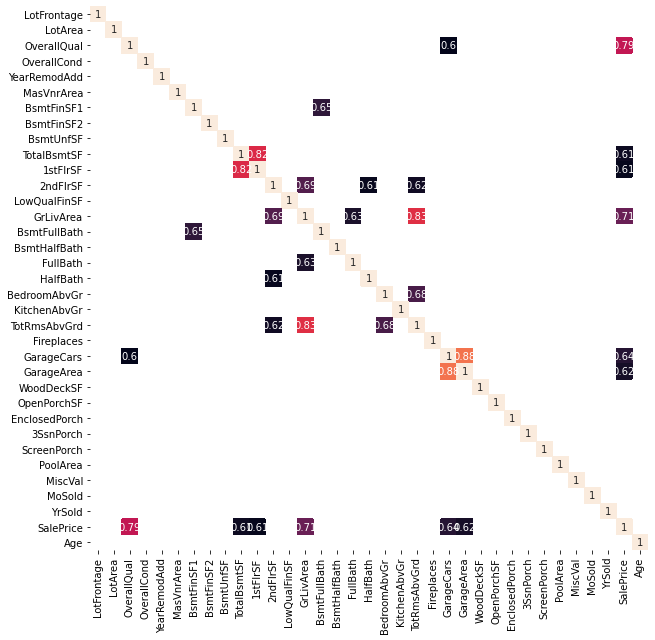

In [116]:
plt.figure(figsize=(10,10))
x=df_num.corr()[abs(df_num.corr())>0.6]
sns.heatmap(x,annot=True,cbar=False)
plt.show()

In [117]:
df_num.drop(['BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

In [118]:
df_num.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
LotFrontage,1.000000,0.304522,0.234812,-0.053281,0.083348,0.178469,0.214367,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771,-0.023601
LotArea,0.304522,1.000000,0.105806,-0.005636,0.013788,0.103321,0.214103,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.050809
OverallQual,0.234812,0.105806,1.000000,-0.091932,0.550684,0.407252,0.239666,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.381595
OverallCond,-0.053281,-0.005636,-0.091932,1.000000,0.073741,-0.125694,-0.046231,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.287367
YearRemodAdd,0.083348,0.013788,0.550684,0.073741,1.000000,0.176529,0.128451,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.530041
MasVnrArea,0.178469,0.103321,0.407252,-0.125694,0.176529,1.000000,0.261256,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,-0.183093
BsmtFinSF1,0.214367,0.214103,0.239666,-0.046231,0.128451,0.261256,1.000000,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.098714
TotalBsmtSF,0.363472,0.260833,0.537808,-0.171098,0.291066,0.360067,0.522396,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581,-0.228684
1stFlrSF,0.413773,0.299475,0.476224,-0.144203,0.240379,0.339850,0.445863,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852,-0.152285
2ndFlrSF,0.072388,0.050986,0.295493,0.028942,0.140024,0.173800,-0.137079,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.035164,-0.028700,0.319334,-0.041377


In [119]:
pd.options.display.float_format='{:.2f}'.format

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF_Factor']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features']=df_num.columns

In [121]:
vif

,VIF_Factor,Features
0,15.55,LotFrontage
1,2.66,LotArea
2,72.00,OverallQual
3,36.08,OverallCond
4,20450.97,YearRemodAdd
5,1.86,MasVnrArea
6,4.84,BsmtFinSF1
7,27.39,TotalBsmtSF
8,inf,1stFlrSF
9,inf,2ndFlrSF


In [122]:
X=df_num.drop('SalePrice',axis=1)
y=df_num['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
X_new=sm.add_constant(X_train)
model_2=sm.OLS(y_train,X_new).fit()
ms=model_2.summary()

In [123]:
type(ms)

statsmodels.iolib.summary.Summary

In [124]:
df_num[['MoSold','YrSold']].describe()

,MoSold,YrSold
count,1460.00,1460.00
mean,6.32,2007.82
std,2.70,1.33
min,1.00,2006.00
25%,5.00,2007.00
50%,6.00,2008.00
75%,8.00,2009.00
max,12.00,2010.00


In [125]:
df_num[['MoSold']].value_counts()
# most of the houses are sold in 2nd and 3rd quarter of year

MoSold
6         253
7         234
5         204
4         141
8         122
3         106
10         89
11         79
9          63
12         59
1          58
2          52
dtype: int64

In [126]:
df_num[['YrSold']].value_counts()

YrSold
2009      338
2007      329
2006      314
2008      304
2010      175
dtype: int64

### Features having p-values less than 0.05 / Significant features

In [129]:
list(model_2.pvalues[model_2.pvalues<0.05].index)

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'Age']

### Building model on significant features (only numeric features)

In [130]:
X=df_num[(model_2.pvalues[model_2.pvalues<0.05].index)]
y=df_num['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
lr=LinearRegression()
lin_reg_1=lr.fit(X_train,y_train)
y_pred=lin_reg_1.predict(X_test)
print("Train R2:",lin_reg_1.score(X_train,y_train))
print("Test R2:",lin_reg_1.score(X_test,y_test))

Train R2: 0.8040773012773459
Test R2: 0.7890267310311427


### RMSE Train and RMSE Test on Significant features model

In [132]:
y_pred_train=lin_reg_1.predict(X_train)
y_pred_test=lin_reg_1.predict(X_test)
rmse_train_sig=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_sig=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",rmse_train_sig)
print("RMSE Test:",rmse_test_sig)

RMSE Train: 34763.97273856817
RMSE Test: 38031.86450069022


In [133]:
df_model_perf=model_perf(df_model_perf,'LinearRegression_SignFeatModel(Num)',rmse_train_sig,rmse_test_sig)
df_model_perf

,Model,Train RMSE,Test RMSE
0,LinearRegressionFullModel,19900.73,47854.71
1,LinearRegression_SignFeatModel(Num),34763.97,38031.86


In [134]:
X=df_final.drop('SalePrice',axis=1)
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
X_new=sm.add_constant(X_train)
model_3=sm.OLS(y_train,X_new).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     51.35
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:30:11   Log-Likelihood:                -13219.
No. Observations:                1168   AIC:                         2.696e+04
Df Residuals:                     909   BIC:                         2.827e+04
Df Model:                         258                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.906e+04   1.21e+06      0.049      0.961   -2.31e+06    2.43e+06
LotFrontage                 49.4905     50.080      0.988      0.323     -48.796     147.777
LotArea                      0.6714      0.147      4.581      0.000       0.384       0.959
OverallQual               6366.3389   1172.004      5.432      0.000    4066.191    8666.487
OverallCond               5268.5585    998.264      5.278      0.000    3309.389    7227.728
YearRemodAdd                89.6475     62.946      1.424      0.155     -33.888     213.183
MasVnrArea                  34.9117      6.793      5.139      0.000      21.580      48.244
BsmtFinSF1                  13.3863      3.271      4.092      0.000       6.966      19.806
BsmtFinSF2                  10.2157      6.794      1.504      0.133      -3.118      23.550
BsmtUnfSF                   -3.6554      3.144     -1.163      0.245      -9.826       2.516
TotalBsmtSF                 19.9466      4.719      4.227      0.000      10.685      29.209
1stFlrSF                     7.2582      7.230      1.004      0.316      -6.931      21.447
2ndFlrSF                    30.9227      6.096      5.072      0.000      18.958      42.887
LowQualFinSF                -6.3049     15.174     -0.416      0.678     -36.085      23.475
GrLivArea                   31.8760      6.314      5.049      0.000      19.484      44.267
BsmtFullBath              1212.0150   2314.511      0.524      0.601   -3330.391    5754.421
BsmtHalfBath              1407.7611   3470.374      0.406      0.685   -5403.116    8218.638
FullBath                  5255.1802   2551.418      2.060      0.040     247.825    1.03e+04
HalfBath                  3207.0050   2431.944      1.319      0.188   -1565.873    7979.883
BedroomAbvGr             -3763.4548   1577.138     -2.386      0.017   -6858.709    -668.201
KitchenAbvGr             -1.134e+04   7205.613     -1.574      0.116   -2.55e+04    2801.300
TotRmsAbvGrd              1676.4708   1098.939      1.526      0.127    -480.281    3833.223
Fireplaces                5616.7290   2952.132      1.903      0.057    -177.058    1.14e+04
GarageCars                3189.2685   2702.714      1.180      0.238   -2115.017    8493.554
GarageArea                  17.0710      9.046      1.887      0.059      -0.683      34.825
WoodDeckSF                  19.9129      6.734      2.957      0.003       6.696      33.130
OpenPorchSF                  7.9310     14.223      0.558      0.577     -19.982      35.844
EnclosedPorch               15.2817     14.862      1.028      0.304     -13.887      44.450
3SsnPorch                   42.5481     24.854      1.712      0.087      -6.231      91.327
ScreenPorch                 23.2927     15.235      1.529      0.127      -6.606      53.192
PoolArea      

In [135]:
X.shape

(1460, 272)

In [136]:
X.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF_Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features']=X.columns

In [138]:
vif

,VIF_Factor,Features
0,30.04,LotFrontage
1,7.31,LotArea
2,118.87,OverallQual
3,71.53,OverallCond
4,35262.06,YearRemodAdd
5,4.20,MasVnrArea
6,inf,BsmtFinSF1
7,inf,BsmtFinSF2
8,inf,BsmtUnfSF
9,inf,TotalBsmtSF


In [139]:
list(model_3.pvalues[model_3.pvalues<0.05].index)

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'WoodDeckSF',
 'MSZoning_FV',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosN',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_CBlock',
 'Exterior2nd_CBlock',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_PConc',
 'Foundation_Wood',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Po',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtFinType1_GLQ',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Typ',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_Detchd',
 

In [140]:
X=df_final[(model_3.pvalues[model_3.pvalues<0.05].index)]
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
lr=LinearRegression()
lin_reg_2=lr.fit(X_train,y_train)
y_pred=lin_reg_2.predict(X_test)
print("Train R2:",lin_reg_2.score(X_train,y_train))
print("Test R2:",lin_reg_2.score(X_test,y_test))

Train R2: 0.8956748365200335
Test R2: 0.6104545191733219


In [142]:
y_pred_train=lin_reg_2.predict(X_train)
y_pred_test=lin_reg_2.predict(X_test)
rmse_train_sig_full=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_sig_full=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",rmse_train_sig_full)
print("RMSE Test:",rmse_test_sig_full)

RMSE Train: 25367.727303634576
RMSE Test: 51678.86729877434


In [143]:
df_model_perf=model_perf(df_model_perf,'LinearRegression_SignFeatModel(Full)',rmse_train_sig_full,rmse_test_sig_full)
df_model_perf

,Model,Train RMSE,Test RMSE
0,LinearRegressionFullModel,19900.73,47854.71
1,LinearRegression_SignFeatModel(Num),34763.97,38031.86
2,LinearRegression_SignFeatModel(Full),25367.73,51678.87


### Removing features which are giving VIF values infinity

In [136]:
df_final.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtQual_No Basement','BsmtFinType1_No Basement','BsmtCond_No Basement'],axis=1,inplace=True)

In [144]:
X=df_final.drop('SalePrice',axis=1)
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
X_new=sm.add_constant(X_train)
model_4=sm.OLS(y_train,X_new).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     51.35
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:39:15   Log-Likelihood:                -13219.
No. Observations:                1168   AIC:                         2.696e+04
Df Residuals:                     909   BIC:                         2.827e+04
Df Model:                         258                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.906e+04   1.21e+06      0.049      0.961   -2.31e+06    2.43e+06
LotFrontage                 49.4905     50.080      0.988      0.323     -48.796     147.777
LotArea                      0.6714      0.147      4.581      0.000       0.384       0.959
OverallQual               6366.3389   1172.004      5.432      0.000    4066.191    8666.487
OverallCond               5268.5585    998.264      5.278      0.000    3309.389    7227.728
YearRemodAdd                89.6475     62.946      1.424      0.155     -33.888     213.183
MasVnrArea                  34.9117      6.793      5.139      0.000      21.580      48.244
BsmtFinSF1                  13.3863      3.271      4.092      0.000       6.966      19.806
BsmtFinSF2                  10.2157      6.794      1.504      0.133      -3.118      23.550
BsmtUnfSF                   -3.6554      3.144     -1.163      0.245      -9.826       2.516
TotalBsmtSF                 19.9466      4.719      4.227      0.000      10.685      29.209
1stFlrSF                     7.2582      7.230      1.004      0.316      -6.931      21.447
2ndFlrSF                    30.9227      6.096      5.072      0.000      18.958      42.887
LowQualFinSF                -6.3049     15.174     -0.416      0.678     -36.085      23.475
GrLivArea                   31.8760      6.314      5.049      0.000      19.484      44.267
BsmtFullBath              1212.0150   2314.511      0.524      0.601   -3330.391    5754.421
BsmtHalfBath              1407.7611   3470.374      0.406      0.685   -5403.116    8218.638
FullBath                  5255.1802   2551.418      2.060      0.040     247.825    1.03e+04
HalfBath                  3207.0050   2431.944      1.319      0.188   -1565.873    7979.883
BedroomAbvGr             -3763.4548   1577.138     -2.386      0.017   -6858.709    -668.201
KitchenAbvGr             -1.134e+04   7205.613     -1.574      0.116   -2.55e+04    2801.300
TotRmsAbvGrd              1676.4708   1098.939      1.526      0.127    -480.281    3833.223
Fireplaces                5616.7290   2952.132      1.903      0.057    -177.058    1.14e+04
GarageCars                3189.2685   2702.714      1.180      0.238   -2115.017    8493.554
GarageArea                  17.0710      9.046      1.887      0.059      -0.683      34.825
WoodDeckSF                  19.9129      6.734      2.957      0.003       6.696      33.130
OpenPorchSF                  7.9310     14.223      0.558      0.577     -19.982      35.844
EnclosedPorch               15.2817     14.862      1.028      0.304     -13.887      44.450
3SsnPorch                   42.5481     24.854      1.712      0.087      -6.231      91.327
ScreenPorch                 23.2927     15.235      1.529      0.127      -6.606      53.192
PoolArea      

In [145]:
list(model_4.pvalues[model_4.pvalues<0.05].index)

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'WoodDeckSF',
 'MSZoning_FV',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosN',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_CBlock',
 'Exterior2nd_CBlock',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_PConc',
 'Foundation_Wood',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Po',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtFinType1_GLQ',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Typ',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_Detchd',
 

In [146]:
X=df_final[(model_4.pvalues[model_4.pvalues<0.05].index)]
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
lr=LinearRegression()
lin_reg_3=lr.fit(X_train,y_train)
y_pred=lin_reg_3.predict(X_test)
print("Train R2:",lin_reg_3.score(X_train,y_train))
print("Test R2:",lin_reg_3.score(X_test,y_test))

Train R2: 0.8956748365200335
Test R2: 0.6104545191733219


In [147]:
y_pred_train=lin_reg_3.predict(X_train)
y_pred_test=lin_reg_3.predict(X_test)
rmse_train_=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",rmse_train_)
print("RMSE Test:",rmse_test_)

RMSE Train: 25367.727303634576
RMSE Test: 51678.86729877434


In [148]:
df_model_perf=model_perf(df_model_perf,'LinearRegression_SignFeatModel(Full)_RInf',rmse_train_,rmse_test_)
df_model_perf

,Model,Train RMSE,Test RMSE
0,LinearRegressionFullModel,19900.73,47854.71
1,LinearRegression_SignFeatModel(Num),34763.97,38031.86
2,LinearRegression_SignFeatModel(Full),25367.73,51678.87
3,LinearRegression_SignFeatModel(Full)_RInf,25367.73,51678.87


In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF_Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features']=X.columns

In [150]:
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,Features
34,inf,Exterior2nd_CBlock
33,inf,Exterior1st_CBlock
59,1743.54,GarageCond_TA
55,1681.53,GarageQual_TA
26,208.49,RoofMatl_CompShg
7,92.12,GrLivArea
1,77.84,OverallQual
52,62.93,GarageQual_Fa
56,47.53,GarageCond_Fa
2,38.60,OverallCond


## Decision Tree Regressor

In [151]:
X=df_final[(model_4.pvalues[model_4.pvalues<0.05].index)]
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
dt=DecisionTreeRegressor(criterion='mse',random_state=20)
dt_model=dt.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("Train R2:",dt_model.score(X_train,y_train))
print("Test R2:",dt_model.score(X_test,y_test))

Train R2: 0.9999949601599808
Test R2: 0.8281699189417795


In [152]:
y_pred_train=dt_model.predict(X_train)
y_pred_test=dt_model.predict(X_test)
rmse_train_dt=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_dt=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",rmse_train_dt)
print("RMSE Test:",rmse_test_dt)

RMSE Train: 176.31749169243625
RMSE Test: 34322.862339326886


In [153]:
df_model_perf=model_perf(df_model_perf,'DecisionTreeReg',rmse_train_dt,rmse_test_dt)
df_model_perf

,Model,Train RMSE,Test RMSE
0,LinearRegressionFullModel,19900.73,47854.71
1,LinearRegression_SignFeatModel(Num),34763.97,38031.86
2,LinearRegression_SignFeatModel(Full),25367.73,51678.87
3,LinearRegression_SignFeatModel(Full)_RInf,25367.73,51678.87
4,DecisionTreeReg,176.32,34322.86


In [154]:
dt_model.feature_importances_

array([1.35927132e-02, 6.43965214e-01, 4.50139185e-03, 3.52217264e-02,
       4.30662871e-02, 5.22507608e-02, 4.90640710e-03, 1.21084878e-01,
       2.00508335e-04, 4.39865651e-03, 2.67518657e-03, 1.12495945e-03,
       7.78116861e-03, 1.62070907e-04, 7.18709625e-05, 0.00000000e+00,
       3.51216892e-04, 2.55447480e-04, 3.89868803e-05, 2.15160503e-03,
       1.10048837e-05, 5.21378388e-05, 5.94886626e-04, 5.99554823e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.93993341e-08, 5.01410189e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.61997108e-04,
       5.55108180e-04, 5.78301065e-04, 0.00000000e+00, 9.73456771e-03,
       4.10443798e-04, 0.00000000e+00, 5.28763483e-04, 2.54856611e-03,
       2.94309254e-03, 1.57508729e-05, 3.76310602e-03, 8.29145977e-04,
       2.31370464e-03, 7.10751823e-04, 6.24594007e-07, 7.60105563e-03,
       1.22732530e-04, 1.41223845e-03, 0.00000000e+00, 1.28664770e-03,
      

## Case Study Day 7

In [155]:
from sklearn.model_selection import cross_val_score

In [172]:
X=df_final.drop('SalePrice',axis=1)
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [173]:
## Cross validation using full dataset
cross_val_score(estimator=DecisionTreeRegressor(),X=X,y=y,cv=5)

array([0.68475117, 0.64600383, 0.83218897, 0.78125851, 0.6019376 ])

In [174]:
## Cross validation on Train dataset
cross_val_score(estimator=DecisionTreeRegressor(),X=X_train,y=y_train,cv=5)

array([0.48196137, 0.67487055, 0.75923636, 0.72108836, 0.78825755])

In [179]:
df_num_1=df_num.copy()
df_num_1.drop(['LotArea','SalePrice'],axis=1,inplace=True)

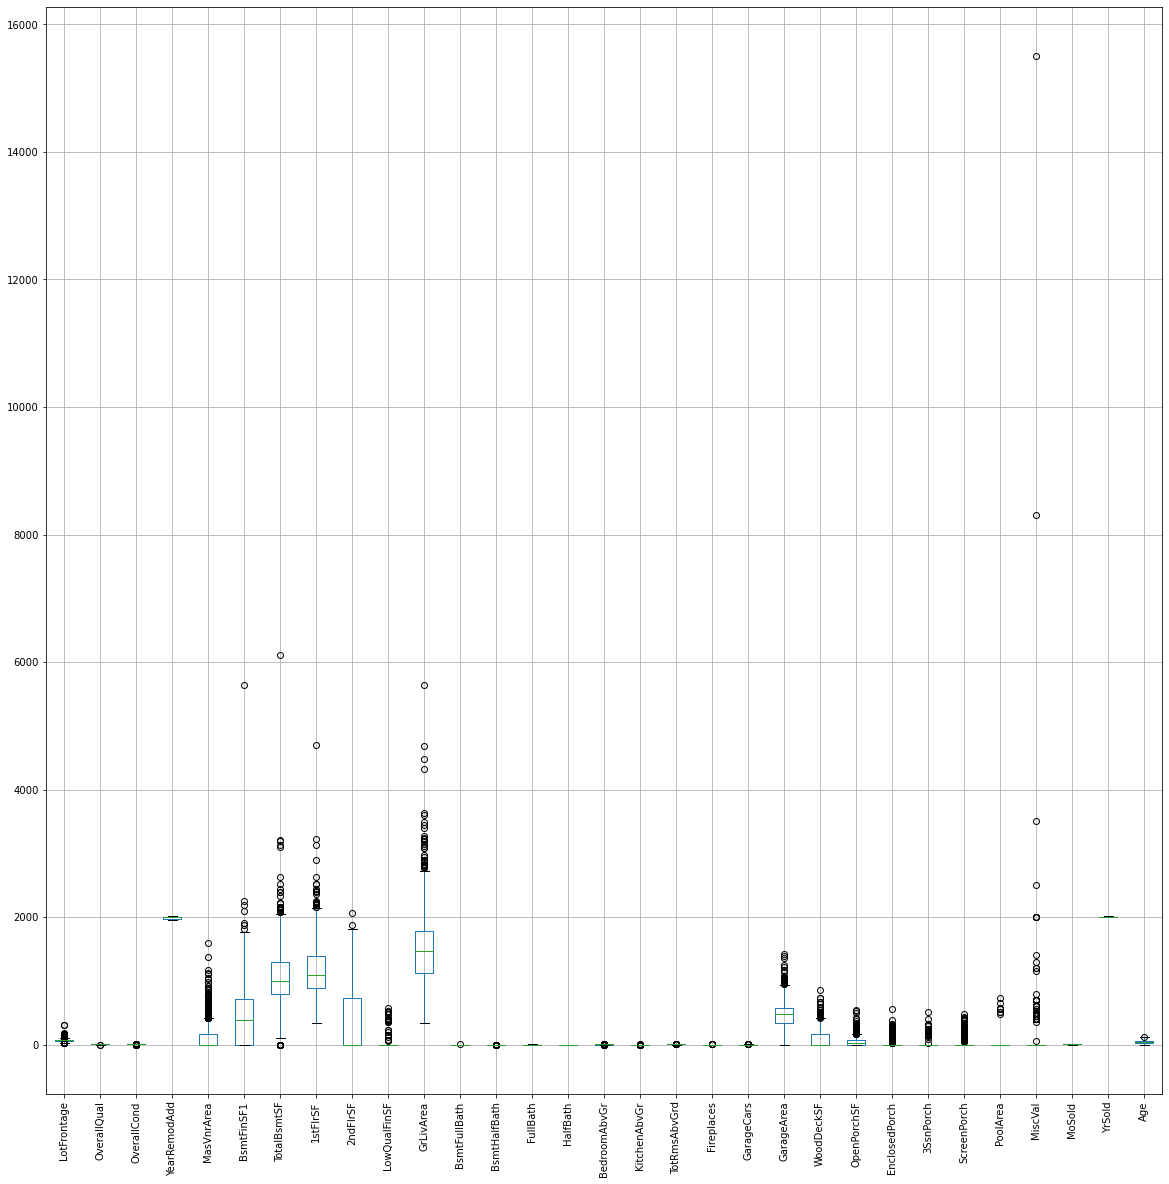

In [180]:
df_num_1.boxplot()
plt.xticks(rotation=90)
plt.show()

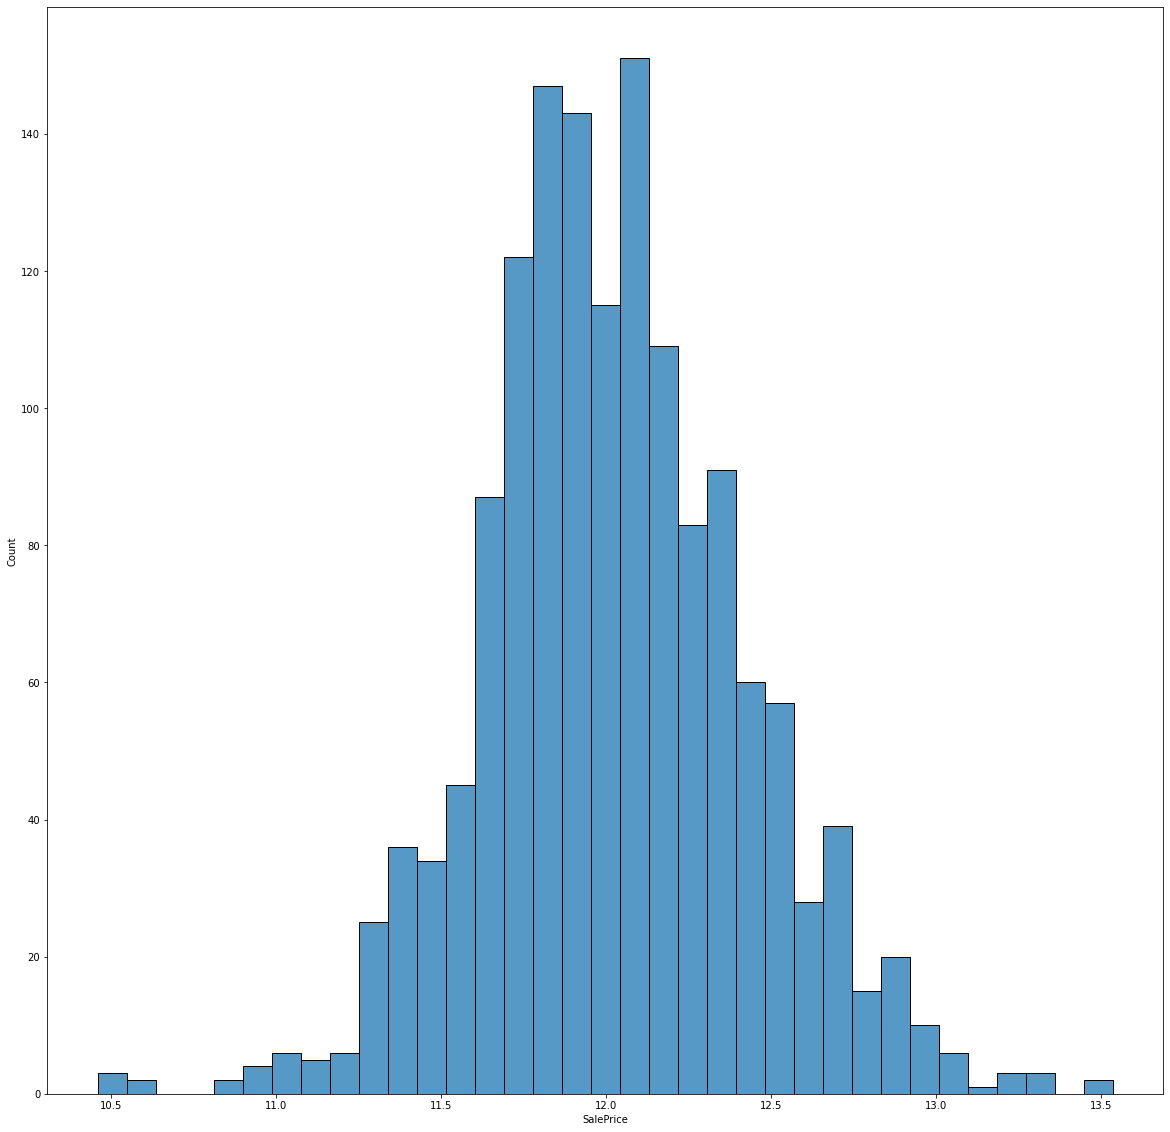

In [182]:
sns.histplot(np.log(df_num['SalePrice']))
plt.show()

In [185]:
X=df_final.drop('SalePrice',axis=1)
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=20)
dt=DecisionTreeRegressor(criterion='mse',random_state=20)
dt_model=dt.fit(X_train,np.log(y_train))
y_pred=dt_model.predict(X_test)
print("Train R2:",dt_model.score(X_train,np.log(y_train)))
print("Test R2:",dt_model.score(X_test,np.log(y_test)))

Train R2: 1.0
Test R2: 0.7456006433357937


In [186]:
y_pred_train=dt_model.predict(X_train)
y_pred_test=dt_model.predict(X_test)
rmse_train_dt=np.sqrt(mean_squared_error(y_train,np.exp(y_pred_train)))
rmse_test_dt=np.sqrt(mean_squared_error(y_test,np.exp(y_pred_test)))
print("RMSE Train:",rmse_train_dt)
print("RMSE Test:",rmse_test_dt)

RMSE Train: 1.014178694877686e-10
RMSE Test: 35622.98016047647


<AxesSubplot:ylabel='Count'>

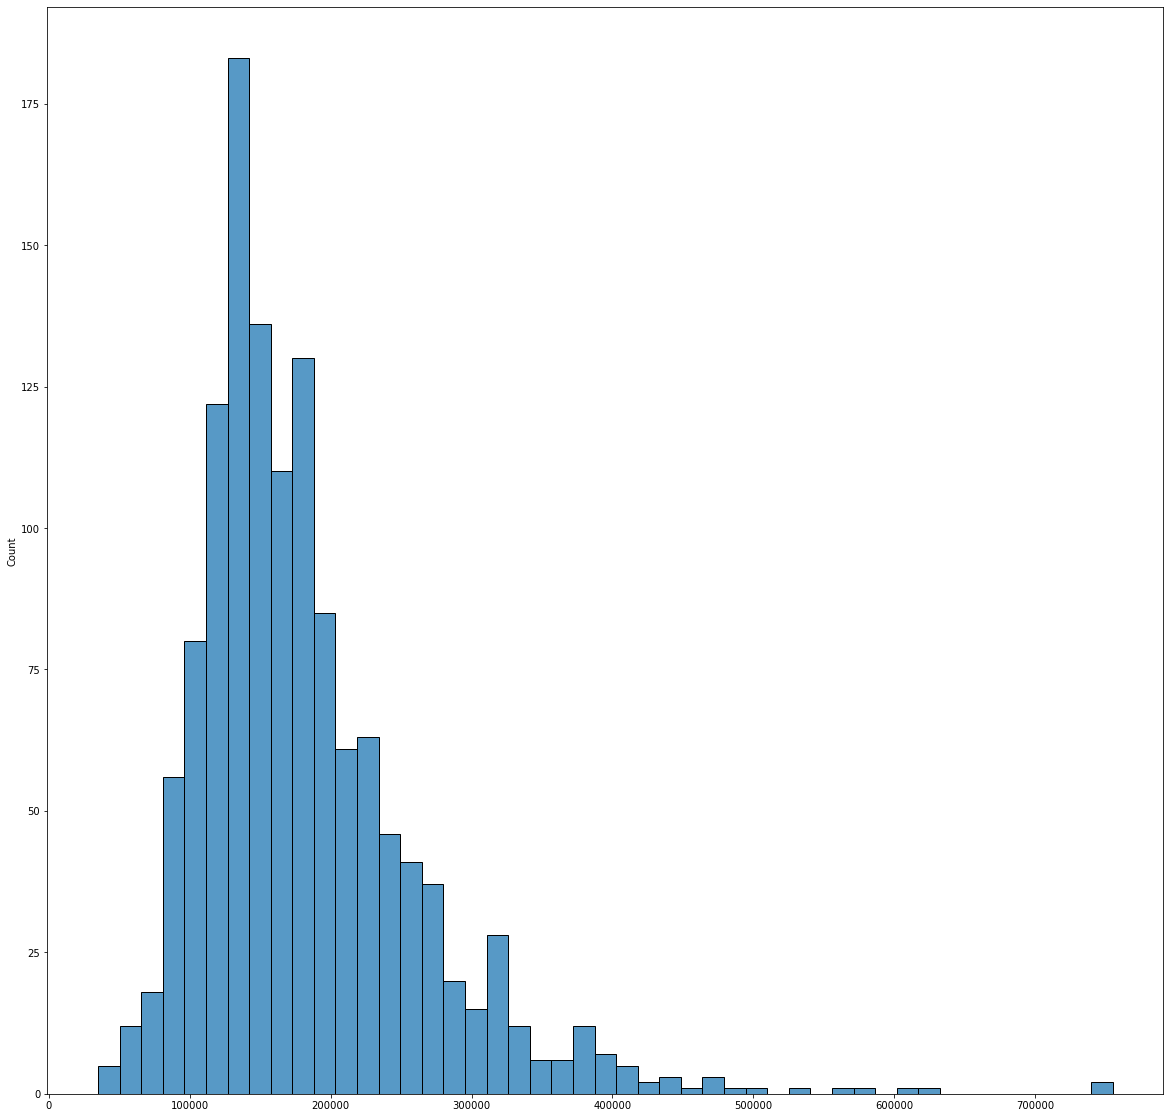

In [189]:
sns.histplot(np.exp(y_pred_train))

<AxesSubplot:ylabel='Count'>

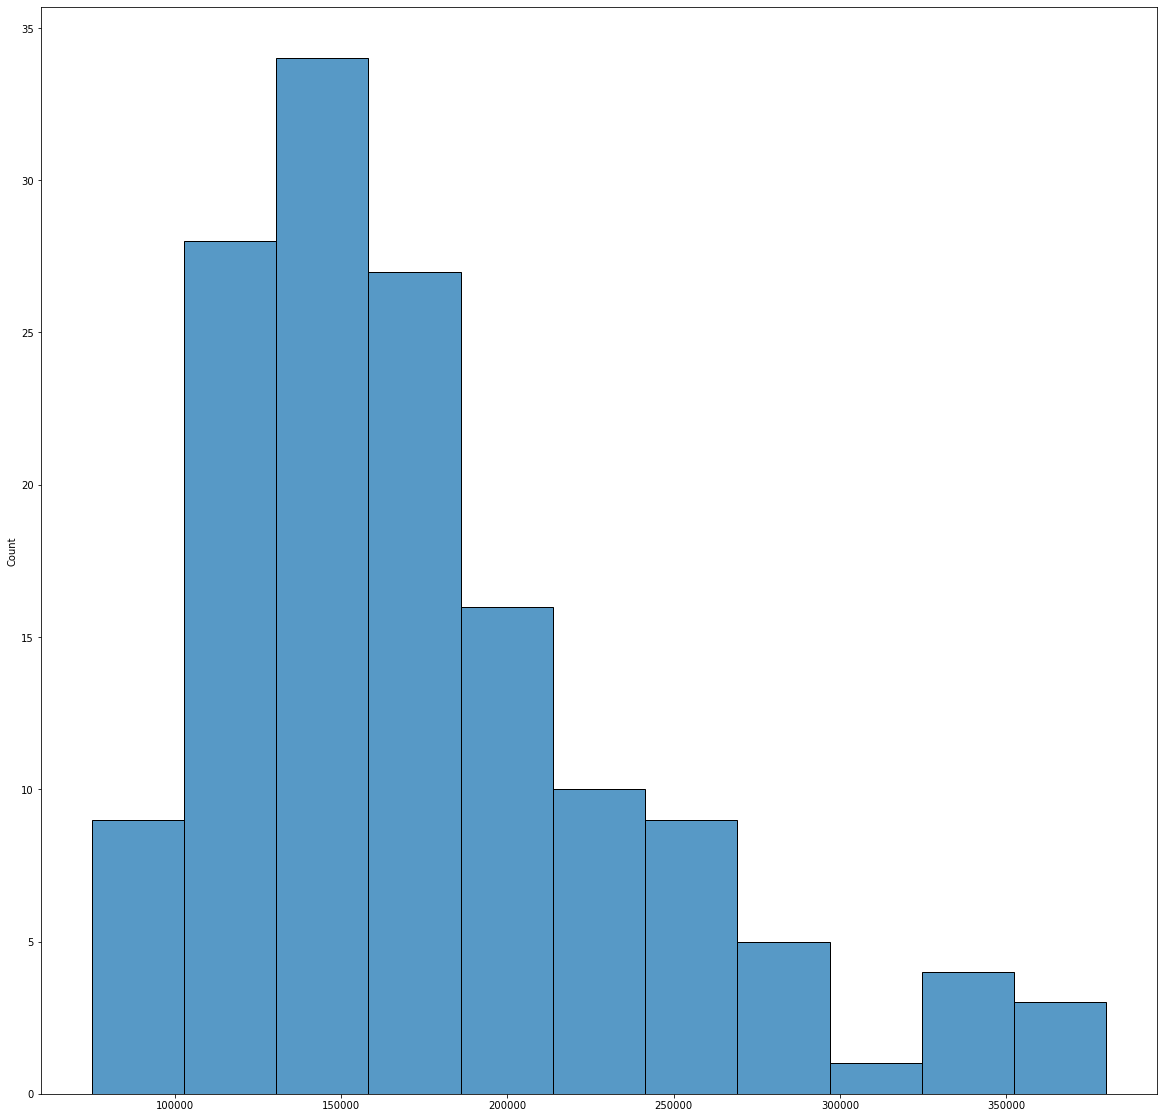

In [190]:
sns.histplot(np.exp(y_pred_test))

<AxesSubplot:xlabel='SalePrice'>

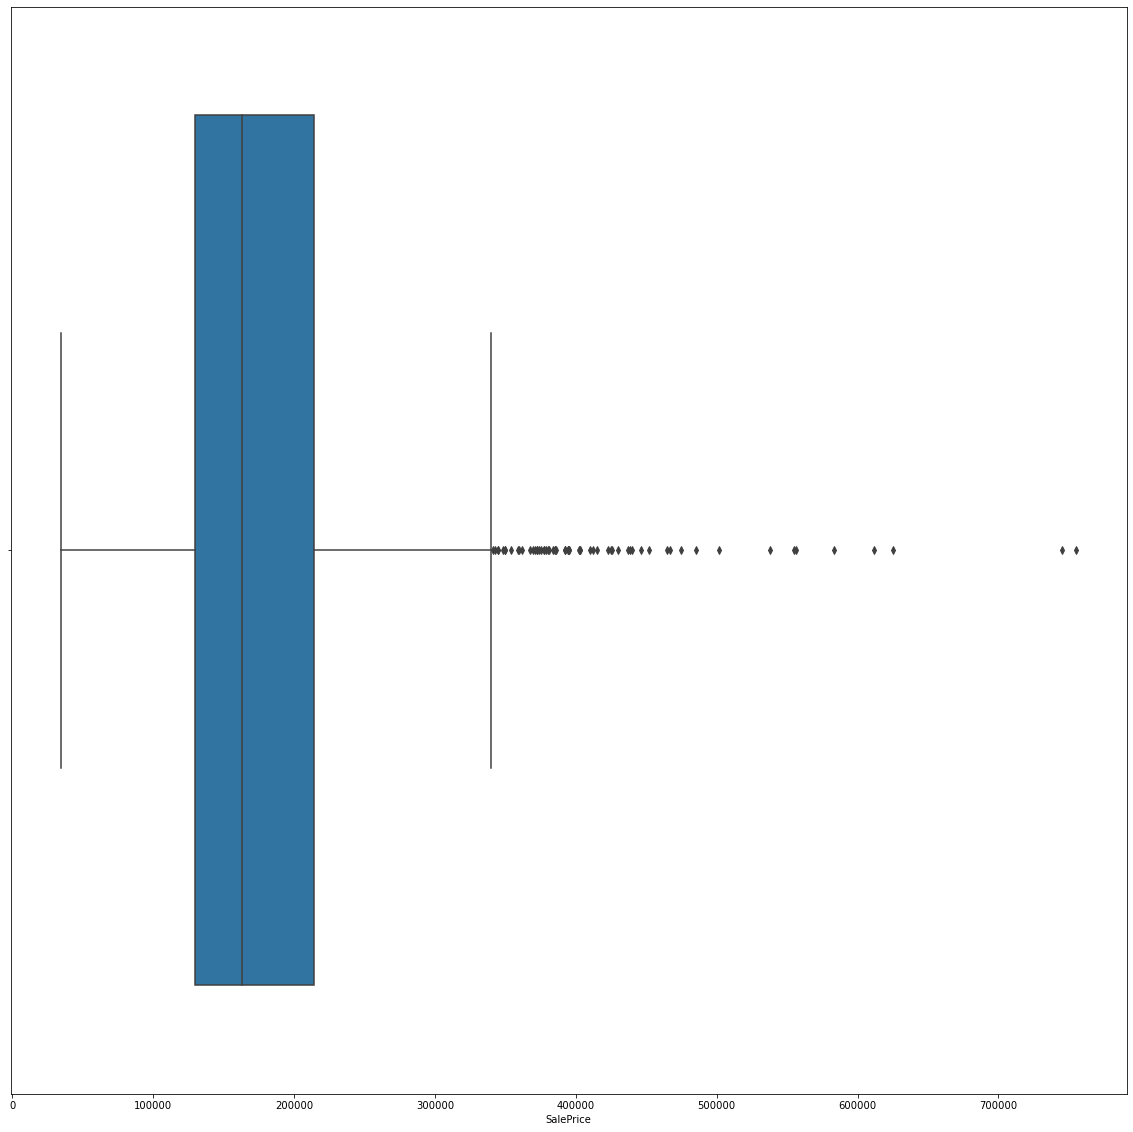

In [191]:
sns.boxplot(df_num['SalePrice'])

In [194]:
from sklearn.preprocessing import PowerTransformer
X=df_final.drop('SalePrice',axis=1)
y=df_final['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=20)
power=PowerTransformer()
powerXtrain=power.fit_transform(X_train)
powerXtest=power.transform(X_test)
dt=DecisionTreeRegressor(criterion='mse',random_state=20)
dt_model=dt.fit(powerXtrain,y_train)
y_pred=dt_model.predict(powerXtest)
print("Train R2:",dt_model.score(powerXtrain,y_train))
print("Test R2:",dt_model.score(powerXtest,y_test))

Train R2: 1.0
Test R2: 0.7379290219696722


In [195]:
y_pred_train=dt_model.predict(powerXtrain)
y_pred_test=dt_model.predict(powerXtest)
rmse_train_dt=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_dt=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",rmse_train_dt)
print("RMSE Test:",rmse_test_dt)

RMSE Train: 0.0
RMSE Test: 38542.87890458398


In [ ]:
## Power Transformation on Numeric Variables and Encoding the categorical variables
## Combine the above two dataframes
## Train-Test Split
## Model Builiding

In [196]:
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,65.00,8450,7,5,2003,196.00,706,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,18.00
1,80.00,9600,6,8,1976,0.00,978,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,45.00
2,68.00,11250,7,5,2002,162.00,486,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,20.00
3,60.00,9550,7,5,1970,0.00,216,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,23.00
4,84.00,14260,8,5,2000,350.00,655,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,21.00


In [221]:
df_num2=df_num.copy()
df_num2.drop('SalePrice',axis=1,inplace=True)

In [222]:
power=PowerTransformer()
features=df_num2.columns
df_num2=pd.DataFrame(power.fit_transform(df_num2),columns=features)
df_num2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age
0,-0.15,-0.16,0.67,-0.45,0.91,1.23,0.78,-0.39,-0.80,1.16,-0.13,0.53,1.18,-0.24,0.79,1.29,0.17,-0.16,0.95,-1.03,0.25,0.35,-0.95,0.83,-0.41,-0.13,-0.29,-0.07,-0.19,-1.69,0.17,-0.79
1,0.55,0.09,-0.03,1.92,-0.69,-0.82,1.11,0.52,0.43,-0.87,-0.13,-0.39,-0.84,4.10,0.79,-0.77,0.17,-0.16,-0.23,0.79,0.25,-0.05,1.19,-1.07,-0.41,-0.13,-0.29,-0.07,-0.19,-0.45,-0.60,0.31
2,-0.00,0.40,0.67,-0.45,0.82,1.21,0.46,-0.24,-0.57,1.16,-0.13,0.66,1.18,-0.24,0.79,1.29,0.17,-0.16,-0.23,0.79,0.25,0.62,-0.95,0.65,-0.41,-0.13,-0.29,-0.07,-0.19,0.99,0.17,-0.70
3,-0.40,0.08,0.67,-0.45,-0.90,-0.82,-0.08,-0.64,-0.43,1.15,-0.13,0.54,1.18,-0.24,-1.02,-0.77,0.17,-0.16,0.39,0.79,1.81,0.78,-0.95,0.57,2.45,-0.13,-0.29,-0.07,-0.19,-1.69,-1.40,-0.56
4,0.72,0.88,1.34,-0.45,0.65,1.28,0.71,0.27,0.13,1.19,-0.13,1.29,1.18,-0.24,0.79,1.29,1.38,-0.16,1.45,0.79,1.81,1.67,1.08,0.99,-0.41,-0.13,-0.29,-0.07,-0.19,1.98,0.17,-0.65


In [223]:
df_cat.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,

In [224]:
df_f=pd.concat([df_num2,df_cat],axis=1)
df_f.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_

In [225]:
X.shape

(1460, 269)

In [236]:
X=df_f
y=df_num['SalePrice']

In [237]:
df_num['SalePrice'].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

In [238]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
dt=DecisionTreeRegressor(criterion='mse',random_state=20,max_depth=10,min_samples_split=50,min_samples_leaf=40)
dt_model=dt.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("Train R2:",dt_model.score(X_train,y_train))
print("Test R2:",dt_model.score(X_test,y_test))

Train R2: 0.7772523150148505
Test R2: 0.7321081629389687


In [239]:
y_pred_train=dt_model.predict(X_train)
y_pred_test=dt_model.predict(X_test)
rmse_train_dt=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_dt=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",rmse_train_dt)
print("RMSE Test:",rmse_test_dt)

RMSE Train: 37067.527897141306
RMSE Test: 42856.198132611804


## Random Forest Regressor

In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
rf=RandomForestRegressor(criterion='mse',n_estimators=1000,random_state=20,max_depth=10,min_samples_split=50,min_samples_leaf=40)
rf_model=rf.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print("Train R2:",rf_model.score(X_train,y_train))
print("Test R2:",rf_model.score(X_test,y_test))

Train R2: 0.7974050952825522
Test R2: 0.7259214944969854


In [241]:
y_pred_train=rf_model.predict(X_train)
y_pred_test=rf_model.predict(X_test)
rmse_train_rf=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_rf=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",rmse_train_rf)
print("RMSE Test:",rmse_test_rf)

RMSE Train: 35350.965756764774
RMSE Test: 43348.23206944064


## Outlier Treatment

In [243]:
df_house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,65.00,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500,18.00
1,20,RL,80.00,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500,45.00
2,60,RL,68.00,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500,20.00
3,70,RL,60.00,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000,23.00
4,60,RL,84.00,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000,21.00


In [282]:
df_num=df_house_price.select_dtypes(include=np.number)
df_cat=df_house_price.select_dtypes(include='object')

In [283]:
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,20,RL,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,70,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [286]:
for i in df_cat.columns:
    print(i)
    print(df_house_price[i].value_counts())

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley
No Alley Access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    10

In [245]:
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,65.00,8450,7,5,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,18.00
1,80.00,9600,6,8,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,45.00
2,68.00,11250,7,5,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,20.00
3,60.00,9550,7,5,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,23.00
4,84.00,14260,8,5,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,21.00


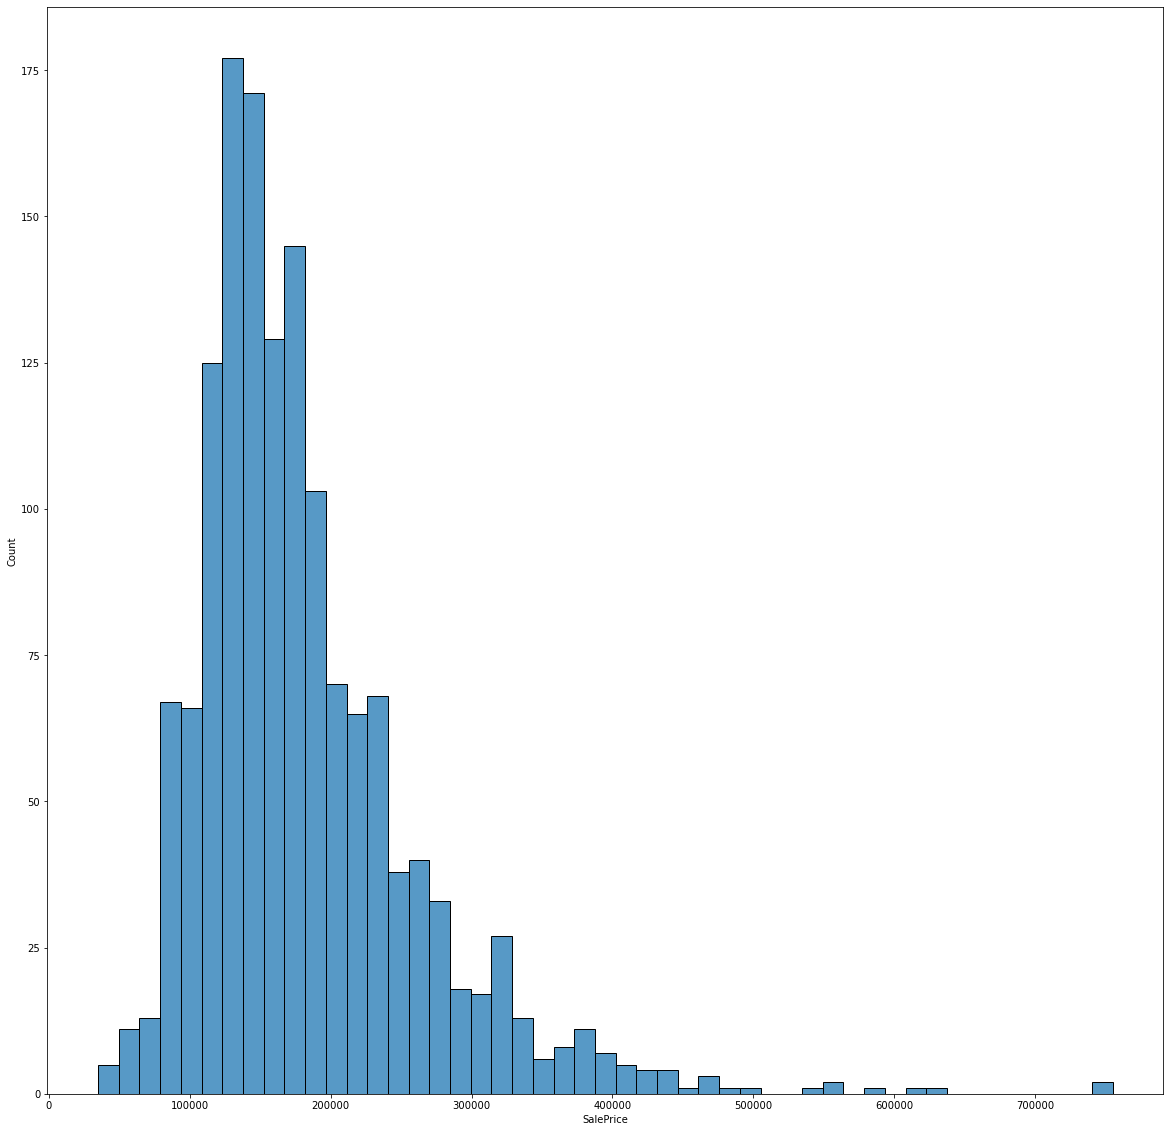

In [246]:
sns.histplot(df_num['SalePrice'])
plt.show()

In [247]:
df_num['SalePrice'].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

In [249]:
df_num[df_num['SalePrice']>500000]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
178,63.00,17423,9,5,2008,2009,748.00,1904,0,312,2216,2234,0,0,2234,1,0,2,0,1,1,9,1,3,1166,0,60,0,0,0,0,0,7,2009,501837,12.00
440,105.00,15431,10,5,2008,2008,200.00,1767,539,788,3094,2402,0,0,2402,1,0,2,0,2,1,10,2,3,672,0,72,0,0,170,0,0,4,2009,555000,13.00
691,104.00,21535,10,6,1994,1995,1170.00,1455,0,989,2444,2444,1872,0,4316,0,1,3,1,4,1,10,2,3,832,382,50,0,0,0,0,0,1,2007,755000,27.00
769,47.00,53504,8,5,2003,2003,603.00,1416,0,234,1650,1690,1589,0,3279,1,0,3,1,4,1,12,1,3,841,503,36,0,0,210,0,0,6,2010,538000,18.00
803,107.00,13891,9,5,2008,2009,424.00,0,0,1734,1734,1734,1088,0,2822,0,0,3,1,4,1,12,1,3,1020,52,170,0,0,192,0,0,1,2009,582933,12.00
898,100.00,12919,9,5,2009,2010,760.00,2188,0,142,2330,2364,0,0,2364,1,0,2,1,2,1,11,2,3,820,0,67,0,0,0,0,0,3,2010,611657,12.00
1046,85.00,16056,9,5,2005,2006,208.00,240,0,1752,1992,1992,876,0,2868,0,0,3,1,4,1,11,1,3,716,214,108,0,0,0,0,0,7,2006,556581,16.00
1169,118.00,35760,10,5,1995,1996,1378.00,1387,0,543,1930,1831,1796,0,3627,1,0,3,1,4,1,10,1,3,807,361,76,0,0,0,0,0,7,2006,625000,26.00
1182,160.00,15623,10,5,1996,1996,0.00,2096,0,300,2396,2411,2065,0,4476,1,0,3,1,4,1,10,2,3,813,171,78,0,0,0,555,0,7,2007,745000,25.00


In [252]:
df_num['BsmtTot']=df_num['BsmtFinSF1']+df_num['BsmtFinSF2']+df_num['BsmtUnfSF']

In [253]:
df_num[['BsmtTot','TotalBsmtSF']]

,BsmtTot,TotalBsmtSF
0,856,856
1,1262,1262
2,920,920
3,756,756
4,1145,1145
5,796,796
6,1686,1686
7,1107,1107
8,952,952
9,991,991


In [254]:
df_num['TotLArea']=df_num['1stFlrSF']+df_num['2ndFlrSF']+df_num['LowQualFinSF']
df_num[['TotLArea','GrLivArea']]

,TotLArea,GrLivArea
0,1710,1710
1,1262,1262
2,1786,1786
3,1717,1717
4,2198,2198
5,1362,1362
6,1694,1694
7,2090,2090
8,1774,1774
9,1077,1077


In [255]:
df_num.drop(['TotLArea','GrLivArea','BsmtTot','TotalBsmtSF'],axis=1,inplace=True)

In [256]:
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,65.00,8450,7,5,2003,2003,196.00,706,0,150,856,854,0,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,18.00
1,80.00,9600,6,8,1976,1976,0.00,978,0,284,1262,0,0,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,45.00
2,68.00,11250,7,5,2001,2002,162.00,486,0,434,920,866,0,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,20.00
3,60.00,9550,7,5,1915,1970,0.00,216,0,540,961,756,0,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,23.00
4,84.00,14260,8,5,2000,2000,350.00,655,0,490,1145,1053,0,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,21.00


In [260]:
df_num[['GarageCars','GarageArea','SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.00,0.88,0.64
GarageArea,0.88,1.00,0.62
SalePrice,0.64,0.62,1.00


In [262]:
df_num.drop('GarageArea',axis=1,inplace=True)

<AxesSubplot:>

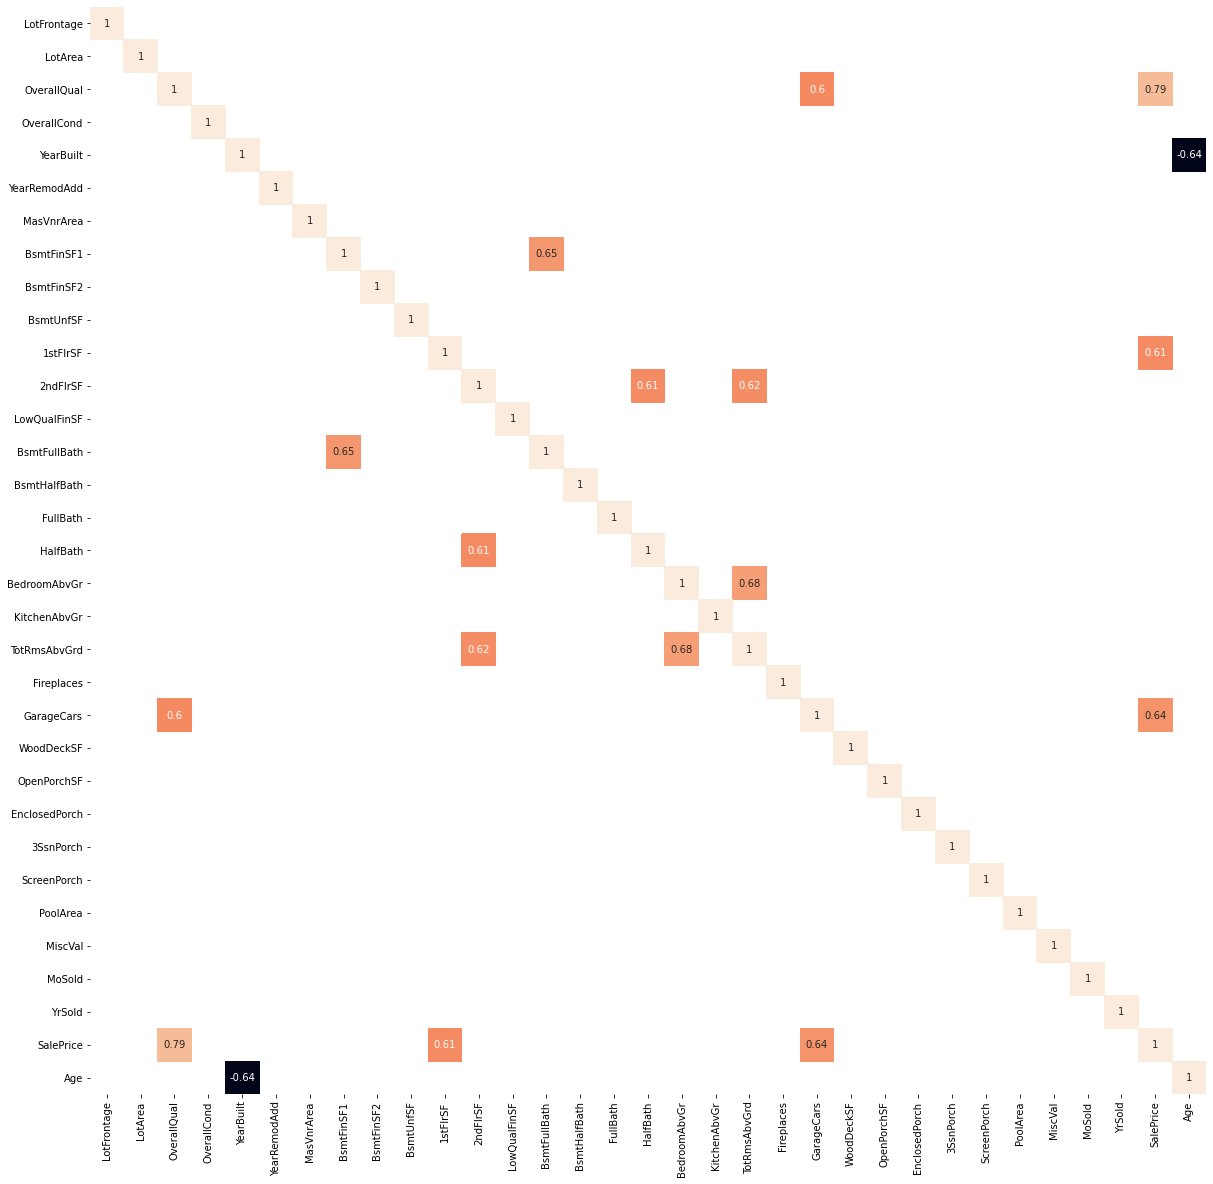

In [265]:
sns.heatmap(df_num.corr()[abs(df_num.corr())>0.6],annot=True,cbar=False)

In [266]:
df_cat=pd.get_dummies(df_cat,drop_first=True)
df_cat.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,

In [274]:
df_num.drop(['YrSold','YearRemodAdd','YearBuilt'],axis=1,inplace=True)

In [275]:
df_com=pd.concat([df_num,df_cat],axis=1)

In [276]:
X=df_com.drop('SalePrice',axis=1)
y=df_com['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=20)
dt=DecisionTreeRegressor(criterion='mse',random_state=20)
dt_model=dt.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("Train R2:",dt_model.score(X_train,y_train))
print("Test R2:",dt_model.score(X_test,y_test))

Train R2: 1.0
Test R2: 0.7143570722677104


In [277]:
y_pred_train=dt_model.predict(X_train)
y_pred_test=dt_model.predict(X_test)
rmse_train_dt=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test_dt=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE Train:",rmse_train_dt)
print("RMSE Test:",rmse_test_dt)

RMSE Train: 0.0
RMSE Test: 40238.92998931422


In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF_Factor']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features']=df_num.columns

In [279]:
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,Features
17,82.79,TotRmsAbvGrd
8,60.41,1stFlrSF
2,54.76,OverallQual
28,30.96,SalePrice
15,29.93,BedroomAbvGr
16,25.97,KitchenAbvGr
3,24.08,OverallCond
13,23.18,FullBath
0,14.88,LotFrontage
19,13.05,GarageCars


In [280]:
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age
0,65.00,8450,7,5,196.00,706,0,150,856,854,0,1,0,2,1,3,1,8,0,2,0,61,0,0,0,0,0,2,208500,18.00
1,80.00,9600,6,8,0.00,978,0,284,1262,0,0,0,1,2,0,3,1,6,1,2,298,0,0,0,0,0,0,5,181500,45.00
2,68.00,11250,7,5,162.00,486,0,434,920,866,0,1,0,2,1,3,1,6,1,2,0,42,0,0,0,0,0,9,223500,20.00
3,60.00,9550,7,5,0.00,216,0,540,961,756,0,1,0,1,0,3,1,7,1,3,0,35,272,0,0,0,0,2,140000,23.00
4,84.00,14260,8,5,350.00,655,0,490,1145,1053,0,1,0,2,1,4,1,9,1,3,192,84,0,0,0,0,0,12,250000,21.00


In [281]:
df_cat.columns

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)